In [ ]:
import os
base_dir="..Dataset/cats_and_dogs_filtered"
train_dir=os.path.join(base_dir,"..cats_and_dogs_filtered\train")
val_dir=os.path.join(base_dir,"..cats_and_dogs_filtered\validation")

print("Train cats:",len(os.listdir(train_dir + "/cats")))
print("Train dogs:",len(os.listdir(train_dir + "/dogs")))
print("Val cats:",len(os.listdir(val_dir + "/cats")))
print("Val dogs:",len(os.listdir(val_dir + "/dogs")))

Train cats: 1000
Train dogs: 1000
Val cats: 500
Val dogs: 500


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_HEIGHT=150
ING_WIDTH=150
BATCH_SIZE=32

Train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen=ImageDataGenerator(rescale=1./255)


In [3]:
#load images from Directory
train_generator=Train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT,ING_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)
validation_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT,ING_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

train_generator.class_indices

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

model=Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape=(IMG_HEIGHT,ING_WIDTH,3)),
    MaxPooling2D(2,2),

    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation="relu"),
    Dropout(0.5),
    Dense(1,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
model.summary()

c:\Users\Premchand Sepeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
EPOCHS=15
history=model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4940 - loss: 0.7178 - val_accuracy: 0.5770 - val_loss: 0.6928
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 517ms/step - accuracy: 0.5220 - loss: 0.6907 - val_accuracy: 0.5710 - val_loss: 0.6672
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 519ms/step - accuracy: 0.5750 - loss: 0.6763 - val_accuracy: 0.5440 - val_loss: 0.7051
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 525ms/step - accuracy: 0.5870 - loss: 0.6650 - val_accuracy: 0.6140 - val_loss: 0.6378
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 532ms/step - accuracy: 0.5560 - loss: 0.6876 - val_accuracy: 0.5240 - val_loss: 0.6809
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 537ms/step - accuracy: 0.5890 - loss: 0.6655 - val_accuracy: 0.6120 - val_loss: 0.6344
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 538ms/step - accuracy: 0.6050 - loss: 0.6626 - val_accuracy: 0.5820 - val_loss: 0.6557
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 527ms/step - accuracy: 0.6110 - loss: 0.6512 - val_accurac

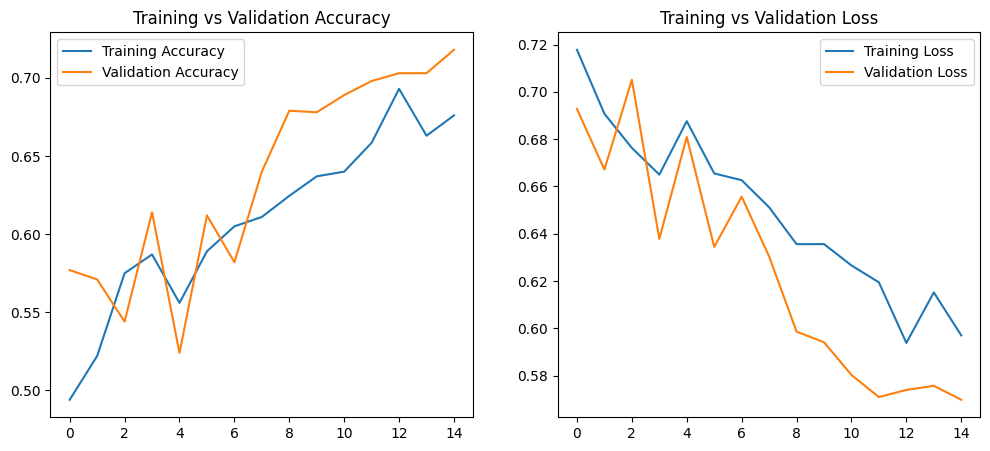

In [6]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')

plt.show()


In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D

base_model = MobileNetV2(
    input_shape=(IMG_HEIGHT, ING_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model


C:\Users\Premchand Sepeni\AppData\Local\Temp\ipykernel_2996\4163506173.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [8]:
from tensorflow.keras.models import Sequential

tl_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
tl_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [9]:
train_datagen_tl = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen_tl = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_gen_tl = train_datagen_tl.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, ING_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_gen_tl = val_datagen_tl.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, ING_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
EPOCHS = 10

history_tl = tl_model.fit(
    train_gen_tl,
    epochs=EPOCHS,
    validation_data=val_gen_tl
)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 42s 573ms/step - accuracy: 0.9065 - loss: 0.2420 - val_accuracy: 0.9600 - val_loss: 0.0937
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 529ms/step - accuracy: 0.9510 - loss: 0.1387 - val_accuracy: 0.9710 - val_loss: 0.0813
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 33s 531ms/step - accuracy: 0.9430 - loss: 0.1413 - val_accuracy: 0.9650 - val_loss: 0.0889
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 561ms/step - accuracy: 0.9550 - loss: 0.1045 - val_accuracy: 0.9660 - val_loss: 0.0852
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 613ms/step - accuracy: 0.9615 - loss: 0.1048 - val_accuracy: 0.9630 - val_loss: 0.1040
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 563ms/step - accuracy: 0.9505 - loss: 0.1209 - val_accuracy: 0.9620 - val_loss: 0.0941
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 657ms/step - accuracy: 0.9615 - loss: 0.1103 - val_accuracy: 0.9720 - val_loss: 0.0842
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 37s 579ms/step - accuracy: 0.9585 - loss: 0.1073 - val_accu

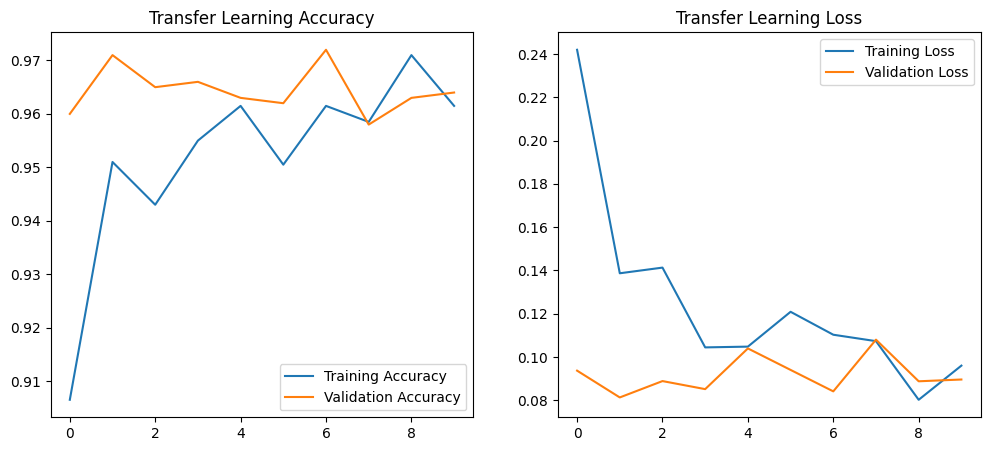

In [11]:
acc = history_tl.history['accuracy']
val_acc = history_tl.history['val_accuracy']

loss = history_tl.history['loss']
val_loss = history_tl.history['val_loss']

epochs_range = range(EPOCHS)

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Transfer Learning Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Transfer Learning Loss')

plt.show()


In [12]:
base_model.trainable = True

# Freeze first ~100 layers, fine-tune rest
for layer in base_model.layers[:100]:
    layer.trainable = False

from tensorflow.keras.optimizers import Adam

tl_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

FINE_TUNE_EPOCHS = 5

history_fine = tl_model.fit(
    train_gen_tl,
    epochs=FINE_TUNE_EPOCHS,
    validation_data=val_gen_tl
)


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 59s 760ms/step - accuracy: 0.8165 - loss: 0.3782 - val_accuracy: 0.9440 - val_loss: 0.1562
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 744ms/step - accuracy: 0.8935 - loss: 0.2536 - val_accuracy: 0.9460 - val_loss: 0.1763
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 735ms/step - accuracy: 0.9160 - loss: 0.2027 - val_accuracy: 0.9500 - val_loss: 0.1494
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 736ms/step - accuracy: 0.9285 - loss: 0.1794 - val_accuracy: 0.9550 - val_loss: 0.1245
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 742ms/step - accuracy: 0.9495 - loss: 0.1386 - val_accuracy: 0.9550 - val_loss: 0.1192


In [ ]:
tl_model.save("..models\cats_vs_dogs_mobilenetv2.h5")
from tensorflow.keras.models import load_model

loaded_model = load_model("..models\cats_vs_dogs_mobilenetv2.h5")
loaded_model.evaluate(val_gen_tl)


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9550 - loss: 0.1192


[0.11917206645011902, 0.9549999833106995]